In [1]:
import os, sys
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt


def unpacker(df, key, num_exp=3, num_rounds=300, idx=0):
    result = []

    for i in range(num_rounds):
        single_elem = []
        for j in range(num_exp):
            single_elem.append(list(df[key])[j * (num_rounds * num_exp) + i * 3 + idx])
        # print(single_elem)
        # single_elem = round(sum(single_elem)/num_exp, 3)
        result.append(single_elem)
    result = torch.Tensor(result)
    mean = result.mean(dim=1)
    under = mean - result.std(dim=1)
    upper = mean + result.std(dim=1)

    mean, under, upper = mean.tolist(), under.tolist(), upper.tolist()
    return mean, under, upper

In [8]:
p0 = './log/0.8/[cifarcnn-cifar10]baseline_0.8/results.csv'
p1 = './log/0.8/[cifarcnn-cifar10]local_pruning_0.8/results.csv'
p2 = './log/0.8/[cifarcnn-cifar10]local_pruning_half_0.8/results.csv'
p3 = './log/0.8/[cifarcnn-cifar10]server_pruning_0.8/results.csv'
# p4 = './log/0.8/[cifarcnn-cifar10]local_pruning_reverse_0.8/results.csv'
p5 = './log/0.8/[cifarcnn-cifar10]server_pruning_reverse_0.8/results.csv'
df0, df1, df2 = pd.read_csv(p0), pd.read_csv(p1), pd.read_csv(p2), 
df3, df5 = pd.read_csv(p3), pd.read_csv(p5), 
# df4 = pd.read_csv(p4), 

In [9]:
cost0, cost1, cost2 = unpacker(df0, 'Cost'), unpacker(df1, 'Cost'), unpacker(df2, 'Cost')
cost3, cost5 = unpacker(df3, 'Cost'), unpacker(df5, 'Cost')
# cost4 = unpacker(df4, 'Cost', 1), 

sparsity0, sparsity1, sparsity2 = unpacker(df0, 'sparsity'), unpacker(df1, 'sparsity'), unpacker(df2, 'sparsity'), 
sparsity3, sparsity5 = unpacker(df3, 'sparsity'), unpacker(df5, 'sparsity'), 
# sparsity4 = unpacker(df4, 'sparsity', 1), 

acc0, acc1, acc2 = unpacker(df0, 'ACC', idx=2), unpacker(df1, 'ACC', idx=2), unpacker(df2, 'ACC', idx=2), 
acc3, acc5 = unpacker(df3, 'ACC', idx=2), unpacker(df5, 'ACC', idx=2)
# acc4 = unpacker(df4, 'ACC', 1, idx=2), 

tr_loss0, tr_loss1, tr_loss2 = unpacker(df0, 'Loss', idx=0), unpacker(df1, 'Loss', idx=0), unpacker(df2, 'Loss', idx=0)
tr_loss3, tr_loss5 = unpacker(df3, 'Loss', idx=0),  unpacker(df5, 'Loss', idx=0)
# tr_loss4 = unpacker(df4, 'Loss', 1, idx=0),

te_loss0, te_loss1, te_loss2 = unpacker(df0, 'Loss', idx=1), unpacker(df1, 'Loss', idx=1), unpacker(df2, 'Loss', idx=1), 
te_loss3, te_loss5 = unpacker(df3, 'Loss', idx=1), unpacker(df5, 'Loss', idx=1)
# te_loss4 = unpacker(df4, 'Loss', 1, idx=1), 

In [10]:
rounds = [x + 1 for x in range(300)]

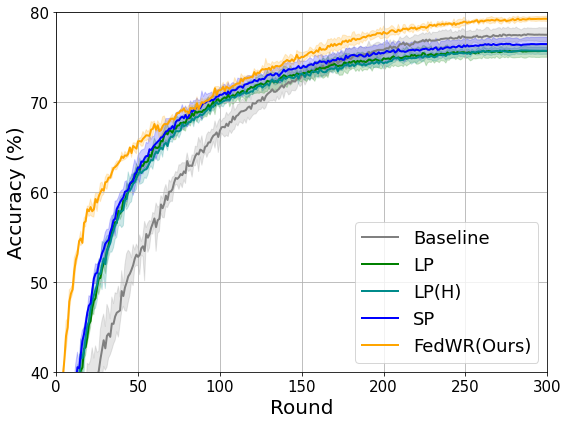

In [11]:
fig = plt.figure(figsize=(8, 6))
plt.yticks([10 * x for x in range(10)], fontsize=15)
plt.xticks([50 * x for x in range(7)], fontsize=15)

plt.plot(rounds, acc0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(rounds, acc0[1], acc0[2], color='gray', alpha=0.2)

plt.plot(rounds, acc1[0], label='LP', lw=2, color='green', alpha=1)
plt.fill_between(rounds, acc1[1], acc1[2], color='green', alpha=0.2)

plt.plot(rounds, acc2[0], label='LP(H)', lw=2, color='darkcyan', alpha=1)
plt.fill_between(rounds, acc2[1], acc2[2], color='darkcyan', alpha=0.2)

plt.plot(rounds, acc3[0], label='SP', lw=2, color='blue', alpha=1)
plt.fill_between(rounds, acc3[1], acc3[2], color='blue', alpha=0.2)

# plt.plot(rounds, acc4[0], label='FedWR(L)', lw=2, color='darkgoldenrod', alpha=1)
# plt.fill_between(rounds, acc4[1], acc4[2], color='darkgoldenrod', alpha=0.2)

plt.plot(rounds, acc5[0], label='FedWR(Ours)', lw=2, color='orange', alpha=1)
plt.fill_between(rounds, acc5[1], acc5[2], color='orange', alpha=0.2)


# plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Round', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
plt.xlim(0, 300)
plt.ylim(40, 80)
plt.legend(fontsize=18, loc='best')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

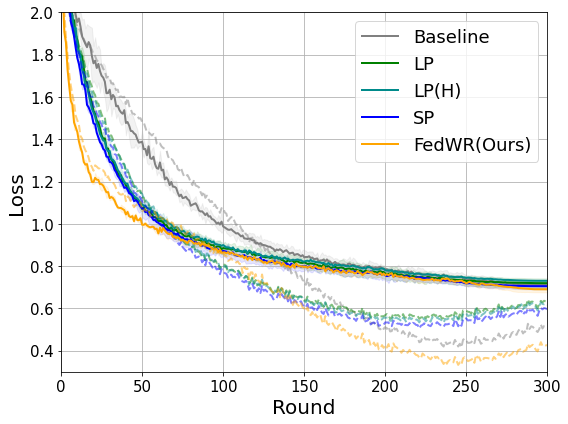

In [12]:
fig = plt.figure(figsize=(8, 6))
plt.xticks([50 * x for x in range(7)], fontsize=15)
plt.yticks([0.2 * y for y in range(11)], fontsize=15)

plt.plot(rounds, te_loss0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(rounds, te_loss0[1], te_loss0[2], color='gray', alpha=0.1)
plt.plot(rounds, tr_loss0[0], lw=2, color='gray', alpha=0.5, linestyle='--')

plt.plot(rounds, te_loss1[0], label='LP', lw=2, color='green', alpha=1)
plt.fill_between(rounds, te_loss1[1], te_loss1[2], color='green', alpha=0.1)
plt.plot(rounds, tr_loss1[0], lw=2, color='green', alpha=0.5, linestyle='--')

plt.plot(rounds, te_loss2[0], label='LP(H)', lw=2, color='darkcyan', alpha=1)
plt.fill_between(rounds, te_loss2[1], te_loss2[2], color='darkcyan', alpha=0.1)
plt.plot(rounds, tr_loss2[0], lw=2, color='darkcyan', alpha=0.5, linestyle='--')

plt.plot(rounds, te_loss3[0], label='SP', lw=2, color='blue', alpha=1)
plt.fill_between(rounds, te_loss3[1], te_loss3[2], color='blue', alpha=0.1)
plt.plot(rounds, tr_loss3[0], lw=2, color='blue', alpha=0.5, linestyle='--')

# plt.plot(rounds, te_loss4[0], label='FedWR(L)', lw=2, color='darkgoldenrod', alpha=1)
# plt.fill_between(rounds, te_loss4[1], te_loss4[2], color='darkgoldenrod', alpha=0.1)
# plt.plot(rounds, tr_loss4[0], lw=2, color='darkgoldenrod', alpha=0.5, linestyle='--')

plt.plot(rounds, te_loss5[0], label='FedWR(Ours)', lw=2, color='orange', alpha=1)
plt.fill_between(rounds, te_loss5[1], te_loss5[2], color='orange', alpha=0.1)
plt.plot(rounds, tr_loss5[0], lw=2, color='orange', alpha=0.5, linestyle='--')

# plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Round', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlim(0, 300)
plt.ylim(0.3, 2)
plt.legend(fontsize=18, loc='best')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

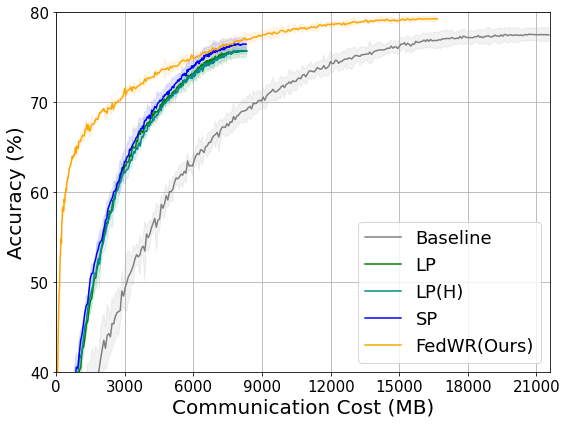

In [13]:
fig = plt.figure(figsize=(8, 6))
plt.yticks([10 * x for x in range(10)], fontsize=15)
plt.xticks([3000 * x for x in range(15)], fontsize=15)

plt.plot(cost0[0], acc0[0], label='Baseline', lw=1.5, color='gray', alpha=1)
plt.fill_between(cost0[0], acc0[1], acc0[2], color='gray', alpha=0.1)

plt.plot(cost1[0], acc1[0], label='LP', lw=1.5, color='green', alpha=1)
plt.fill_between(cost1[0], acc1[1], acc1[2], color='green', alpha=0.1)

plt.plot(cost2[0], acc2[0], label='LP(H)', lw=1.5, color='darkcyan', alpha=1)
plt.fill_between(cost2[0], acc2[1], acc2[2], color='darkcyan', alpha=0.1)

plt.plot(cost3[0], acc3[0], label='SP', lw=1.5, color='blue', alpha=1)
plt.fill_between(cost3[0], acc3[1], acc3[2], color='blue', alpha=0.1)

# plt.plot(cost4[0], acc4[0], label='FedWR(L)', lw=1.5, color='darkgoldenrod', alpha=1)
# plt.fill_between(cost4[0], acc4[1], acc4[2], color='darkgoldenrod', alpha=0.1)

plt.plot(cost5[0], acc5[0], label='FedWR(Ours)', lw=1.5, color='orange', alpha=1)
plt.fill_between(cost5[0], acc5[1], acc5[2], color='orange', alpha=0.1)

plt.xlabel('Communication Cost (MB)', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
plt.xlim(0, 21600)
plt.ylim(40, 80)
plt.legend(fontsize=18, loc='lower right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

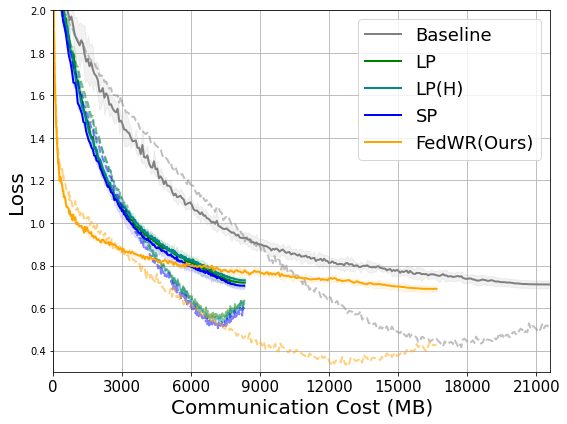

In [14]:
fig = plt.figure(figsize=(8, 6))
plt.xticks([2000 * x for x in range(10)], fontsize=15)
plt.xticks([3000 * x for x in range(15)], fontsize=15)

plt.plot(cost0[0], te_loss0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(cost0[0], te_loss0[1], te_loss0[2], color='gray', alpha=0.1)
plt.plot(cost0[0], tr_loss0[0], lw=2, color='gray', alpha=0.5, linestyle='--')

plt.plot(cost1[0], te_loss1[0], label='LP', lw=2, color='green', alpha=1)
plt.fill_between(cost1[0], te_loss1[1], te_loss1[2], color='green', alpha=0.1)
plt.plot(cost1[0], tr_loss1[0], lw=2, color='green', alpha=0.5, linestyle='--')

plt.plot(cost2[0], te_loss2[0], label='LP(H)', lw=2, color='darkcyan', alpha=1)
plt.fill_between(cost2[0], te_loss2[1], te_loss2[2], color='darkcyan', alpha=0.1)
plt.plot(cost2[0], tr_loss2[0], lw=2, color='darkcyan', alpha=0.5, linestyle='--')

plt.plot(cost3[0], te_loss3[0], label='SP', lw=2, color='blue', alpha=1)
plt.fill_between(cost3[0], te_loss3[1], te_loss3[2], color='blue', alpha=0.1)
plt.plot(cost3[0], tr_loss3[0], lw=2, color='blue', alpha=0.5, linestyle='--')

# plt.plot(cost4[0], te_loss4[0], label='FedWR(L)', lw=2, color='darkgoldenrod', alpha=1)
# plt.fill_between(cost4[0], te_loss4[1], te_loss4[2], color='darkgoldenrod', alpha=0.1)
# plt.plot(cost4[0], tr_loss4[0], lw=2, color='darkgoldenrod', alpha=0.5, linestyle='--')

plt.plot(cost5[0], te_loss5[0], label='FedWR(Ours)', lw=2, color='orange', alpha=1)
plt.fill_between(cost5[0], te_loss5[1], te_loss5[2], color='orange', alpha=0.1)
plt.plot(cost5[0], tr_loss5[0], lw=2, color='orange', alpha=0.5, linestyle='--')


# plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Communication Cost (MB)', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlim(0, 21600)
plt.ylim(0.3, 2)
plt.legend(fontsize=18, loc='best')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

In [15]:
def unpacker(df, key, num_exp=3, num_rounds=150, idx=0):
    result = []

    for i in range(num_rounds):
        single_elem = []
        for j in range(num_exp):
            single_elem.append(list(df[key])[j * (num_rounds * num_exp) + i * 3 + idx])
        # print(single_elem)
        # single_elem = round(sum(single_elem)/num_exp, 3)
        result.append(single_elem)
    result = torch.Tensor(result)
    mean = result.mean(dim=1)
    under = mean - result.std(dim=1)
    upper = mean + result.std(dim=1)

    mean, under, upper = mean.tolist(), under.tolist(), upper.tolist()
    return mean, under, upper

rounds = [x + 1 for x in range(150)]

In [16]:
p0 = './log/0.8/[mnistcnn-mnist]baseline_0.8/results.csv'
p1 = './log/0.8/[mnistcnn-mnist]local_pruning_0.8/results.csv'
p2 = './log/0.8/[mnistcnn-mnist]local_pruning_half_0.8/results.csv'
p3 = './log/0.8/[mnistcnn-mnist]server_pruning_0.8/results.csv'
p5 = './log/0.8/[mnistcnn-mnist]server_pruning_reverse_0.8/results.csv'
df0, df1, df2 = pd.read_csv(p0), pd.read_csv(p1), pd.read_csv(p2), 
df3, df5 = pd.read_csv(p3), pd.read_csv(p5), 
# p4 = './log/0.8/[mnistcnn-mnist]local_pruning_reverse/results.csv'
# df4 = pd.read_csv(p4), 

In [17]:
cost0, cost1, cost2 = unpacker(df0, 'Cost'), unpacker(df1, 'Cost'), unpacker(df2, 'Cost', 1)
cost3, cost5 = unpacker(df3, 'Cost'), unpacker(df5, 'Cost')
# cost4 = unpacker(df4, 'Cost', 1), 

sparsity0, sparsity1, sparsity2 = unpacker(df0, 'sparsity'), unpacker(df1, 'sparsity'), unpacker(df2, 'sparsity', 1), 
sparsity3, sparsity5 = unpacker(df3, 'sparsity'), unpacker(df5, 'sparsity'), 
# sparsity4 = unpacker(df4, 'sparsity', 1), 

acc0, acc1, acc2 = unpacker(df0, 'ACC', idx=2), unpacker(df1, 'ACC', idx=2), unpacker(df2, 'ACC', 1, idx=2), 
acc3, acc5 = unpacker(df3, 'ACC', idx=2), unpacker(df5, 'ACC', idx=2)
# acc4 = unpacker(df4, 'ACC', 1, idx=2), 

tr_loss0, tr_loss1, tr_loss2 = unpacker(df0, 'Loss', idx=0), unpacker(df1, 'Loss', idx=0), unpacker(df2, 'Loss', 1, idx=0)
tr_loss3, tr_loss5 = unpacker(df3, 'Loss', idx=0), unpacker(df5, 'Loss', idx=0)
# tr_loss4 = unpacker(df4, 'Loss', 1, idx=0), 

te_loss0, te_loss1, te_loss2 = unpacker(df0, 'Loss', idx=1), unpacker(df1, 'Loss', idx=1), unpacker(df2, 'Loss', 1, idx=1), 
te_loss3, te_loss5 = unpacker(df3, 'Loss', idx=1), unpacker(df5, 'Loss', idx=1)
# te_loss4 = unpacker(df4, 'Loss', 1, idx=1), 

In [18]:
rounds = [x + 1 for x in range(150)]

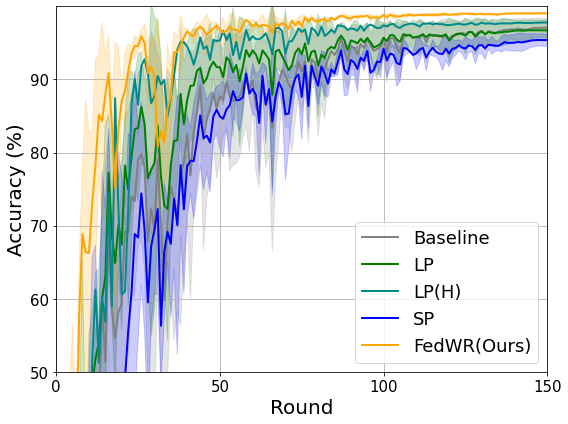

In [19]:
fig = plt.figure(figsize=(8, 6))
plt.yticks([10 * x for x in range(10)], fontsize=15)
plt.xticks([50 * x for x in range(7)], fontsize=15)

plt.plot(rounds, acc0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(rounds, acc0[1], acc0[2], color='gray', alpha=0.2)

plt.plot(rounds, acc1[0], label='LP', lw=2, color='green', alpha=1)
plt.fill_between(rounds, acc1[1], acc1[2], color='green', alpha=0.2)

plt.plot(rounds, acc2[0], label='LP(H)', lw=2, color='darkcyan', alpha=1)
plt.fill_between(rounds, acc2[1], acc2[2], color='darkcyan', alpha=0.2)

plt.plot(rounds, acc3[0], label='SP', lw=2, color='blue', alpha=1)
plt.fill_between(rounds, acc3[1], acc3[2], color='blue', alpha=0.2)

# plt.plot(rounds, acc4[0], label='FedPR(L)', lw=2, color='darkgoldenrod', alpha=1)
# plt.fill_between(rounds, acc4[1], acc4[2], color='darkgoldenrod', alpha=0.2)

plt.plot(rounds, acc5[0], label='FedWR(Ours)', lw=2, color='orange', alpha=1)
plt.fill_between(rounds, acc5[1], acc5[2], color='orange', alpha=0.2)


# plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Round', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
plt.xlim(0, 150)
plt.ylim(50, 100)
plt.legend(fontsize=18, loc='best')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

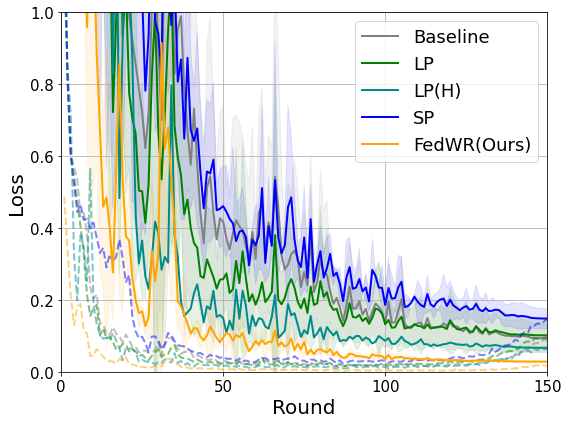

In [20]:
fig = plt.figure(figsize=(8, 6))
plt.xticks([50 * x for x in range(7)], fontsize=15)
plt.yticks([0.2 * y for y in range(11)], fontsize=15)

plt.plot(rounds, te_loss0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(rounds, te_loss0[1], te_loss0[2], color='gray', alpha=0.1)
plt.plot(rounds, tr_loss0[0], lw=2, color='gray', alpha=0.5, linestyle='--')

plt.plot(rounds, te_loss1[0], label='LP', lw=2, color='green', alpha=1)
plt.fill_between(rounds, te_loss1[1], te_loss1[2], color='green', alpha=0.1)
plt.plot(rounds, tr_loss1[0], lw=2, color='green', alpha=0.5, linestyle='--')

plt.plot(rounds, te_loss2[0], label='LP(H)', lw=2, color='darkcyan', alpha=1)
plt.fill_between(rounds, te_loss2[1], te_loss2[2], color='darkcyan', alpha=0.1)
plt.plot(rounds, tr_loss2[0], lw=2, color='darkcyan', alpha=0.5, linestyle='--')

plt.plot(rounds, te_loss3[0], label='SP', lw=2, color='blue', alpha=1)
plt.fill_between(rounds, te_loss3[1], te_loss3[2], color='blue', alpha=0.1)
plt.plot(rounds, tr_loss3[0], lw=2, color='blue', alpha=0.5, linestyle='--')

# plt.plot(rounds, te_loss4[0], label='FedRP(L)', lw=2, color='darkgoldenrod', alpha=1)
# plt.fill_between(rounds, te_loss4[1], te_loss4[2], color='darkgoldenrod', alpha=0.1)
# plt.plot(rounds, tr_loss4[0], lw=2, color='darkgoldenrod', alpha=0.5, linestyle='--')

plt.plot(rounds, te_loss5[0], label='FedWR(Ours)', lw=2, color='orange', alpha=1)
plt.fill_between(rounds, te_loss5[1], te_loss5[2], color='orange', alpha=0.1)
plt.plot(rounds, tr_loss5[0], lw=2, color='orange', alpha=0.5, linestyle='--')

# plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Round', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlim(0, 150)
plt.ylim(0, 1)
plt.legend(fontsize=18, loc='best')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

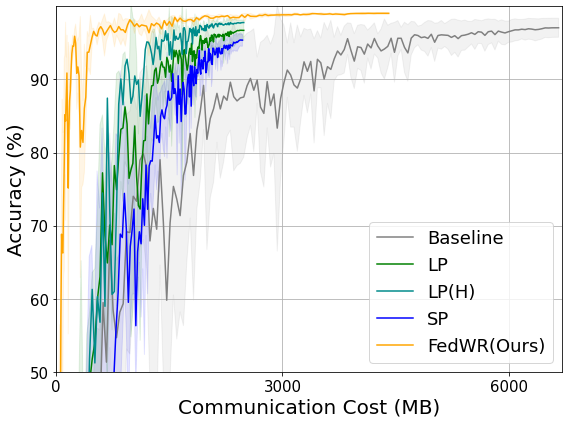

In [21]:
fig = plt.figure(figsize=(8, 6))
plt.yticks([10 * x for x in range(10)], fontsize=15)
plt.xticks([3000 * x for x in range(15)], fontsize=15)

plt.plot(cost0[0], acc0[0], label='Baseline', lw=1.5, color='gray', alpha=1)
plt.fill_between(cost0[0], acc0[1], acc0[2], color='gray', alpha=0.1)

plt.plot(cost1[0], acc1[0], label='LP', lw=1.5, color='green', alpha=1)
plt.fill_between(cost1[0], acc1[1], acc1[2], color='green', alpha=0.1)

plt.plot(cost2[0], acc2[0], label='LP(H)', lw=1.5, color='darkcyan', alpha=1)
plt.fill_between(cost2[0], acc2[1], acc2[2], color='darkcyan', alpha=0.1)

plt.plot(cost3[0], acc3[0], label='SP', lw=1.5, color='blue', alpha=1)
plt.fill_between(cost3[0], acc3[1], acc3[2], color='blue', alpha=0.1)

# plt.plot(cost4[0], acc4[0], label='FedRP(L)', lw=1.5, color='darkgoldenrod', alpha=1)
# plt.fill_between(cost4[0], acc4[1], acc4[2], color='darkgoldenrod', alpha=0.1)

plt.plot(cost5[0], acc5[0], label='FedWR(Ours)', lw=1.5, color='orange', alpha=1)
plt.fill_between(cost5[0], acc5[1], acc5[2], color='orange', alpha=0.1)

plt.xlabel('Communication Cost (MB)', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
plt.xlim(0, 6700)
plt.ylim(50, 100)
plt.legend(fontsize=18, loc='lower right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

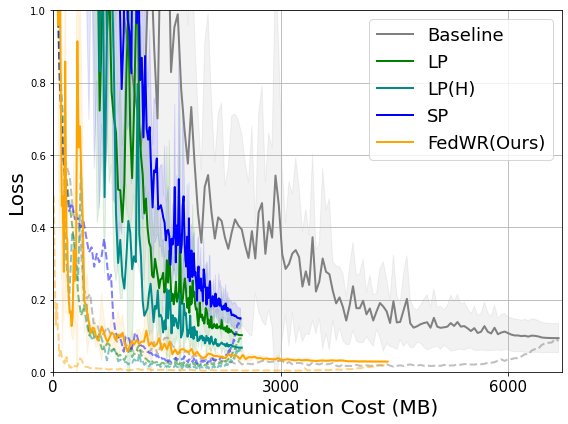

In [22]:
fig = plt.figure(figsize=(8, 6))
plt.xticks([2000 * x for x in range(10)], fontsize=15)
plt.xticks([3000 * x for x in range(15)], fontsize=15)

plt.plot(cost0[0], te_loss0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(cost0[0], te_loss0[1], te_loss0[2], color='gray', alpha=0.1)
plt.plot(cost0[0], tr_loss0[0], lw=2, color='gray', alpha=0.5, linestyle='--')

plt.plot(cost1[0], te_loss1[0], label='LP', lw=2, color='green', alpha=1)
plt.fill_between(cost1[0], te_loss1[1], te_loss1[2], color='green', alpha=0.1)
plt.plot(cost1[0], tr_loss1[0], lw=2, color='green', alpha=0.5, linestyle='--')

plt.plot(cost2[0], te_loss2[0], label='LP(H)', lw=2, color='darkcyan', alpha=1)
plt.fill_between(cost2[0], te_loss2[1], te_loss2[2], color='darkcyan', alpha=0.1)
plt.plot(cost2[0], tr_loss2[0], lw=2, color='darkcyan', alpha=0.5, linestyle='--')

plt.plot(cost3[0], te_loss3[0], label='SP', lw=2, color='blue', alpha=1)
plt.fill_between(cost3[0], te_loss3[1], te_loss3[2], color='blue', alpha=0.1)
plt.plot(cost3[0], tr_loss3[0], lw=2, color='blue', alpha=0.5, linestyle='--')

# plt.plot(cost4[0], te_loss4[0], label='FedRP(L)', lw=2, color='darkgoldenrod', alpha=1)
# plt.fill_between(cost4[0], te_loss4[1], te_loss4[2], color='darkgoldenrod', alpha=0.1)
# plt.plot(cost4[0], tr_loss4[0], lw=2, color='darkgoldenrod', alpha=0.5, linestyle='--')

plt.plot(cost5[0], te_loss5[0], label='FedWR(Ours)', lw=2, color='orange', alpha=1)
plt.fill_between(cost5[0], te_loss5[1], te_loss5[2], color='orange', alpha=0.1)
plt.plot(cost5[0], tr_loss5[0], lw=2, color='orange', alpha=0.5, linestyle='--')


# plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Communication Cost (MB)', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlim(0, 6700)
plt.ylim(0, 1)
plt.legend(fontsize=18, loc='best')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()